In [34]:
import pandas as pd
df = pd.read_csv('ST_train.csv')
#df = pd.read_csv('ST_test.csv')

In [35]:
HomePlanet_pred_df = df[['HomePlanet', 'Cabin']].copy()
HomePlanet_pred_df = HomePlanet_pred_df.dropna()
HomePlanet_pred_df[['deck', 'num', 'side']] = HomePlanet_pred_df['Cabin'].str.split('/', expand=True)
HomePlanet_pred_df = HomePlanet_pred_df.drop(['Cabin', 'side'], axis=1)
HomePlanet_pred_df.head()

,HomePlanet,deck,num
0,Earth,G,3
1,Earth,F,4
2,Europa,C,0
3,Europa,C,1
4,Earth,F,5


In [36]:
HomePlanet_pred_df.shape

(4091, 3)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the 'deck' categorical data to numeric
label_encoder_deck = LabelEncoder()
label_encoder_homeplanet = LabelEncoder()
HomePlanet_pred_df['deck_encoded'] = label_encoder_deck.fit_transform(HomePlanet_pred_df['deck'])

# Prepare the feature matrix (X) and the target vector (y)
X = HomePlanet_pred_df[['deck_encoded', 'num']]
y = label_encoder_homeplanet.fit_transform(HomePlanet_pred_df['HomePlanet'])  # Also encode the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the testing data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"DecisionTree 'deck_encoded', 'num' model accuracy: {accuracy}")

DecisionTree 'deck_encoded', 'num' model accuracy: 0.811965811965812


In [38]:
#label_encoder_homeplanet = LabelEncoder()

# Prepare the feature matrix (X) and the target vector (y)
X = HomePlanet_pred_df[['deck_encoded']]
y = label_encoder_homeplanet.fit_transform(HomePlanet_pred_df['HomePlanet'])  # Also encode the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
decision_tree2 = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree2.fit(X_train, y_train)

# Predict on the testing data
y_pred = decision_tree2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"DecisionTree 'deck_encoded' model accuracy: {accuracy}")

DecisionTree 'deck_encoded' model accuracy: 0.7521367521367521


In [39]:
HomePlanet_pred_df.head()

,HomePlanet,deck,num,deck_encoded
0,Earth,G,3,6
1,Earth,F,4,5
2,Europa,C,0,2
3,Europa,C,1,2
4,Earth,F,5,5


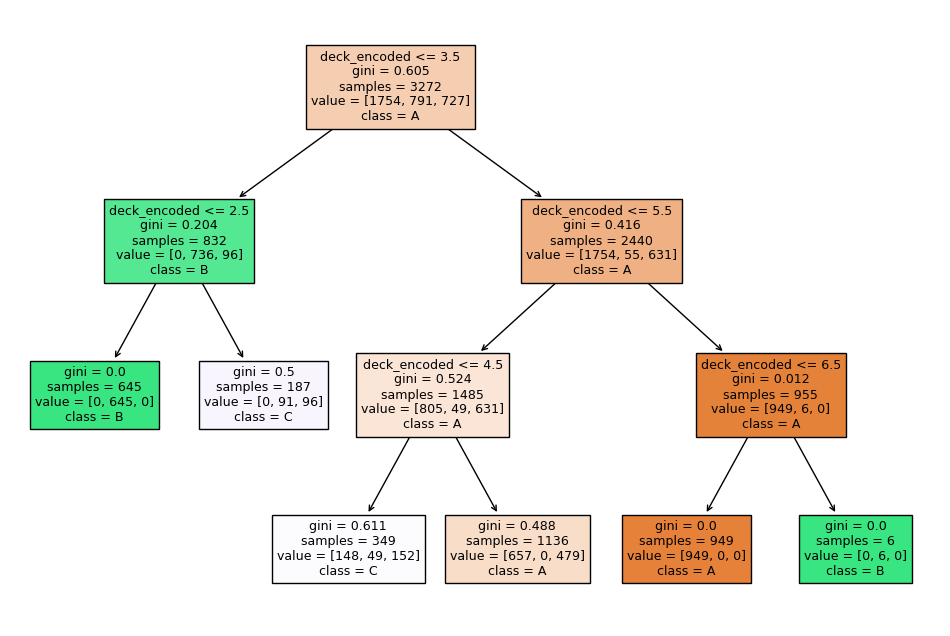

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
# Visualize the decision tree using plot_tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree2, filled=True, feature_names=['deck_encoded'], class_names=label_encoder_deck.classes_)
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Fit and transform 'deck' and 'HomePlanet' with label encoder
#df['deck_encoded'] = label_encoder_deck.fit_transform(df['deck'])
HomePlanet_pred_df['HomePlanet_encoded'] = label_encoder_homeplanet.fit_transform(HomePlanet_pred_df['HomePlanet'])

# Prepare the feature matrix (X) and the target vector (y)
X = HomePlanet_pred_df[['deck_encoded', 'num']]
y = HomePlanet_pred_df['HomePlanet_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Adjust test_size as needed

# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators can be adjusted

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Predict on the testing data (optional)
y_pred = random_forest.predict(X_test)

# Evaluate the model (optional)
accuracy = accuracy_score(y_test, y_pred)
print(f"RandomForest model accuracy: {accuracy}")

# To see the importance of each feature
feature_importances = random_forest.feature_importances_
print(dict(zip(['deck_encoded', 'num'], feature_importances)))

RandomForest model accuracy: 0.7858306188925082
{'deck_encoded': 0.47722066826611814, 'num': 0.5227793317338818}


Verdict: RandomForest does not improve prediction accuracy

**final imputation**

In [42]:
HomePlanet_imput_df = df[['HomePlanet', 'Cabin']].copy()
HomePlanet_imput_df[['deck', 'num', 'side']] = HomePlanet_imput_df['Cabin'].str.split('/', expand=True)
HomePlanet_imput_df = HomePlanet_imput_df.drop(['Cabin', 'side', 'num'], axis=1)
HomePlanet_imput_df.head()

,HomePlanet,deck
0,Earth,G
1,Earth,F
2,Europa,C
3,Europa,C
4,Earth,F


In [43]:
HomePlanet_imput_df.to_csv('HomePlanet_imput_df.csv', index=True)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the 'deck' column as it was done before training the model
label_encoder_deck = LabelEncoder()
HomePlanet_imput_df['deck_encoded'] = label_encoder_deck.fit_transform(HomePlanet_imput_df['deck'])

# Identify the rows where 'HomePlanet' is missing
missing_homeplanet_mask = HomePlanet_imput_df['HomePlanet'].isnull()

# Prepare the features for prediction
X_missing = HomePlanet_imput_df.loc[missing_homeplanet_mask, ['deck_encoded']]

# Predict the missing values using the trained model
predicted_homeplanet_encoded = decision_tree2.predict(X_missing)

# Decode the predictions back to original categories
predicted_homeplanet = label_encoder_homeplanet.inverse_transform(predicted_homeplanet_encoded)

# Fill in the missing values with the predictions
HomePlanet_imput_df.loc[missing_homeplanet_mask, 'HomePlanet'] = predicted_homeplanet

# df now has the missing 'HomePlanet' values imputed

In [45]:
HomePlanet_imput_df.to_csv('HomePlanet_imput_df_fin.csv', index=True)